In [2]:
from Def_funciones import *

import pandas as pd
from numpy import mean
from numpy import median
from numpy import array
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
from math import sqrt
from sklearn.metrics import mean_squared_error

#
from warnings import catch_warnings
from warnings import filterwarnings

# La librería statsmodel tiene implementaciones de SARIMA y de Holt-Winters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Si el computador tiene procesadores múltiples, se aprovecharán
#from multiprocessing import cpu_count

from multiprocess import cpu_count
from joblib import Parallel

from joblib import delayed



# Caso: Ninguna tendencia - Nacimiento niñas

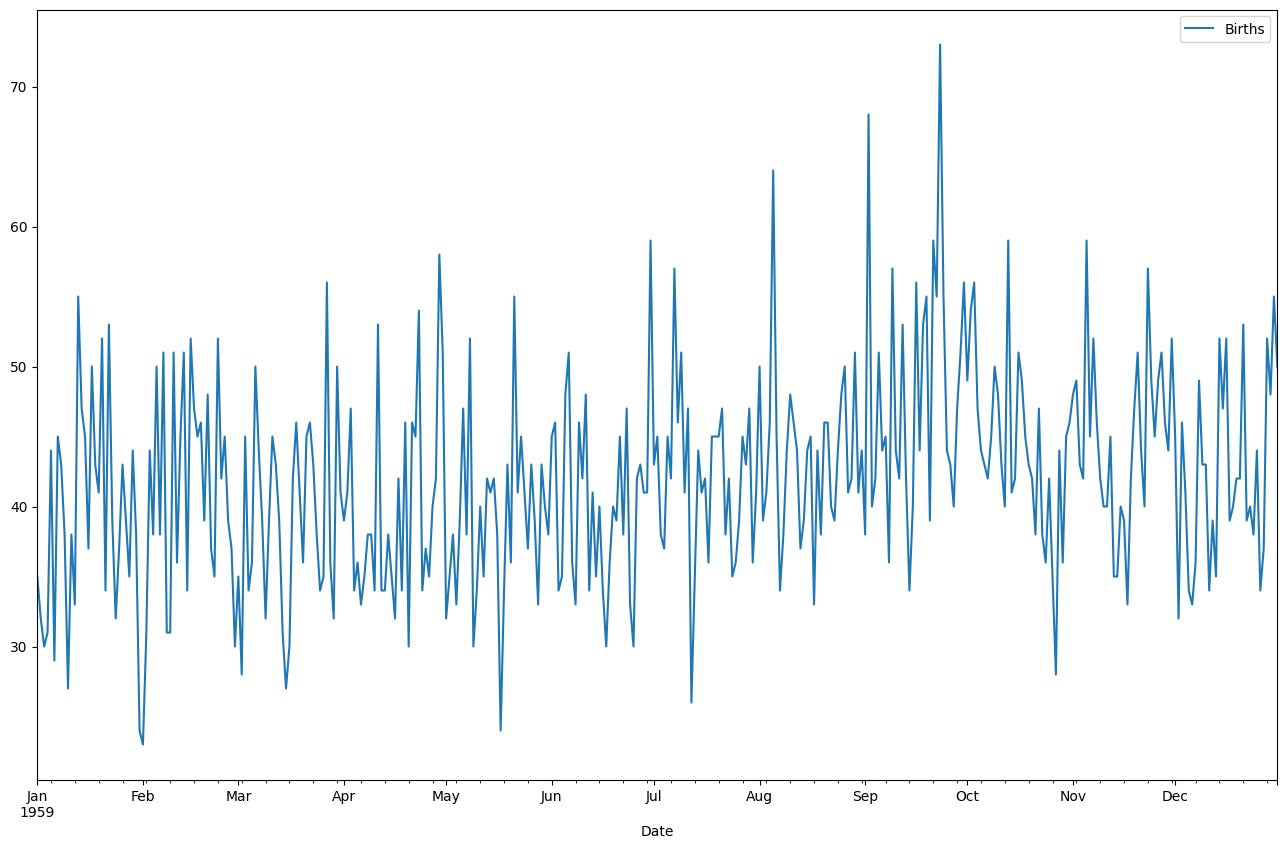

In [3]:
series = pd.read_csv('daily-total-female-births.csv', header=0, 
                     parse_dates = ["Date"], index_col = 0)
#import seaborn; seaborn.set()
series.plot(figsize=(16,10))
plt.savefig('nac_fem.png', transparent = True)

Tamaño Entrenamiento 292
Tamaño Prueba 73
Encontrando la mejor solución para promedio
584
terminado
[192, 'mediana'] 6.375251808080867
[191, 'mediana'] 6.380621346477417
[153, 'mediana'] 6.394561045052593


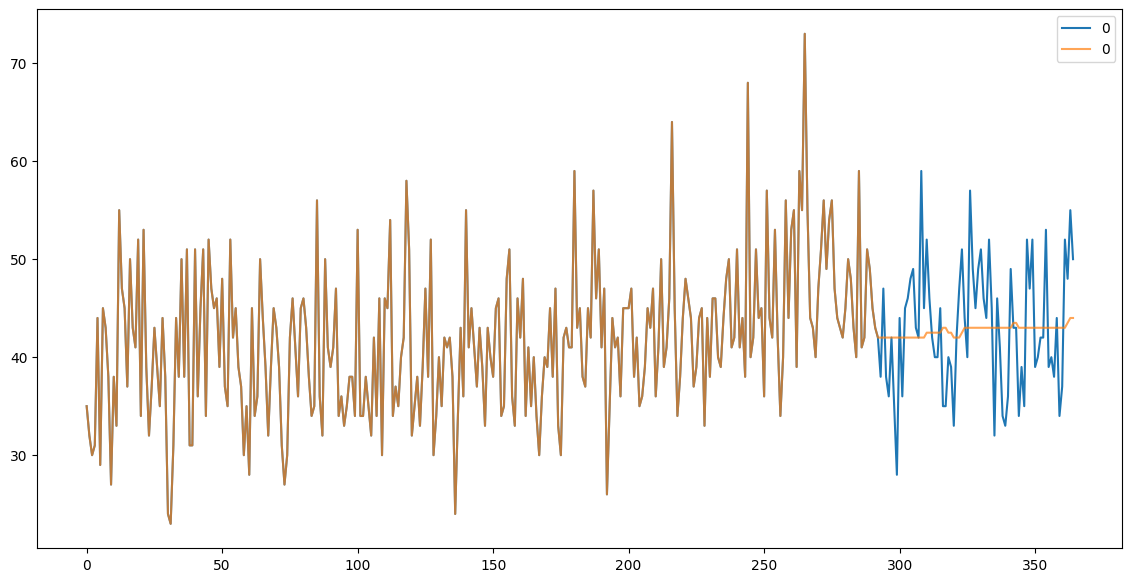

Tamaño Entrenamiento 292
Tamaño Prueba 73
Encontrando la mejor solución para sarima
72
terminado
[(2, 0, 0), (0, 0, 0, 0), 'c'] 6.229422863189241
[(1, 0, 0), (0, 0, 0, 0), 'c'] 6.271032076892793
[(0, 0, 2), (0, 0, 0, 0), 'c'] 6.272134388166806


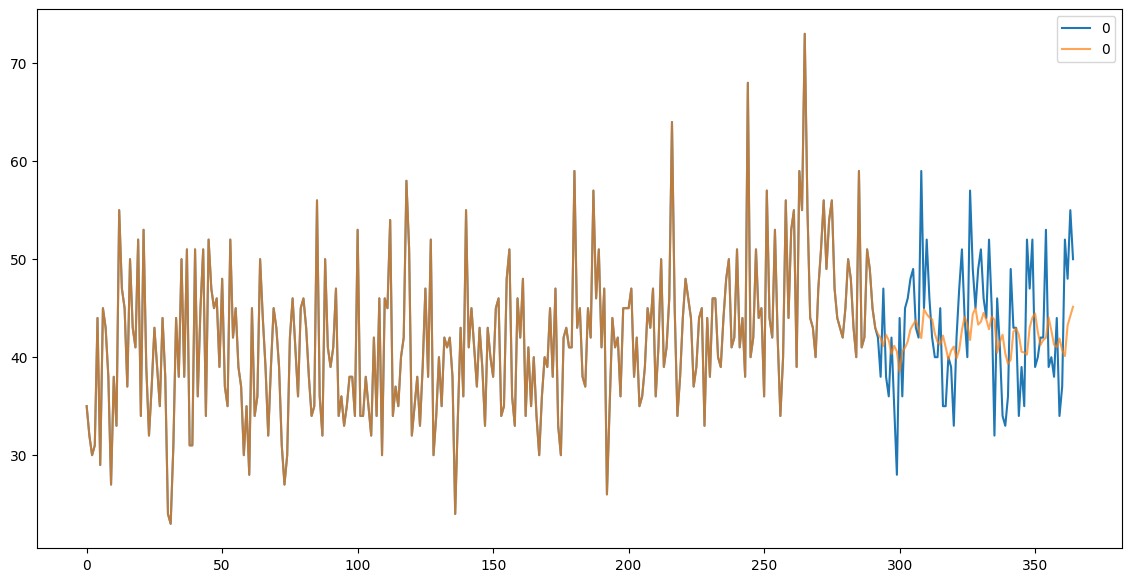

Tamaño Entrenamiento 292
Tamaño Prueba 73
Encontrando la mejor solución para exp
0
terminado


IndexError: list index out of range

In [4]:
series = pd.read_csv('daily-total-female-births.csv', header = 0, index_col = 0)
nombre = "nacimiento-feminas"
encontrar_mejor_solucion(series, nombre, metodo = "promedio")
encontrar_mejor_solucion(series, nombre, metodo = "sarima")
encontrar_mejor_solucion(series, nombre, metodo = "exp")

# Caso:  Con Tendencia - Ventas Shampoo

In [ ]:
series = pd.read_csv('shampoo.csv', header=0)
series["Year"] = [1998] * 12 + [1999] * 12 + [2000] * 12
series["Month"] = list(range(1,13)) * 3
series["Date"] = series["Month"].apply(str) + "-" + series["Year"].apply(str)
series['date']  = pd.to_datetime(series["Date"])
series = series[["date","Sales"]]
series.set_index(['date'],inplace = True)

import seaborn; seaborn.set()
series.plot(figsize = (16,10))
plt.savefig('shampoo.png')

In [ ]:
series = pd.read_csv('shampoo.csv', header = 0, index_col = 0)
nombre="shampoo"
encontrar_mejor_solucion(series, nombre, metodo = "promedio")
encontrar_mejor_solucion(series, nombre, metodo = "sarima")
encontrar_mejor_solucion(series, nombre, metodo = "exp")

# Caso:  Con Estacionalidad - Temperatura

In [ ]:
series = pd.read_csv('monthly-mean-temp.csv', header = 0, parse_dates = ["Month"])
series.set_index(['Month'],inplace=True)
import seaborn; seaborn.set()
series.plot(figsize = (16,10))
plt.savefig('temp.png')

In [ ]:
series = pd.read_csv('monthly-mean-temp.csv', header = 0, index_col = 0)
nombre = "temp"
encontrar_mejor_solucion(series, nombre, metodo = "promedio")
encontrar_mejor_solucion(series, nombre, metodo = "sarima")
encontrar_mejor_solucion(series, nombre, metodo = "exp")

# Caso: Con Tendencia y con Estacionalidad -  Venta mensual de carros

In [ ]:
series = pd.read_csv('monthly-car-sales.csv', header = 0,parse_dates = ["Month"])
series.set_index(['Month'], inplace = True)
import seaborn; seaborn.set()
series.plot(figsize = (16,10))
plt.savefig('cars.png')

In [ ]:
series = pd.read_csv('monthly-car-sales.csv', header=0, index_col=0)
nombre = "carros"
encontrar_mejor_solucion(series, nombre, metodo = "promedio")
encontrar_mejor_solucion(series, nombre, metodo = "sarima")
encontrar_mejor_solucion(series, nombre, metodo = "exp")